# 03_Clusterizacao_KMeans

## 01_import_bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carregar os dados tratados
df = pd.read_excel("dados_para_clusterizacao_final.xlsx")

## 02_Carga_de_dados

In [ ]:
candidatos_tratados = 'https://github.com/Kinrider/tech_challenge_5/raw/refs/heads/main/01_fontes/arquivos_decision/fontes_tratadas/02_candidatos_tratados.parquet'

In [ ]:
df = pd.read_parquet(candidatos_tratados)

## 02_Carga_de_dados

In [2]:
# Abordagem 2: preencher NaNs com -9999 + criar flag binária
colunas_com_nan = df.columns[df.isnull().any()].tolist()
for col in colunas_com_nan:
    df[f"tem_{col}"] = df[col].notnull().astype(int)
    df[col] = df[col].fillna(-9999)

## Análise do Cotovelo (Inércia)

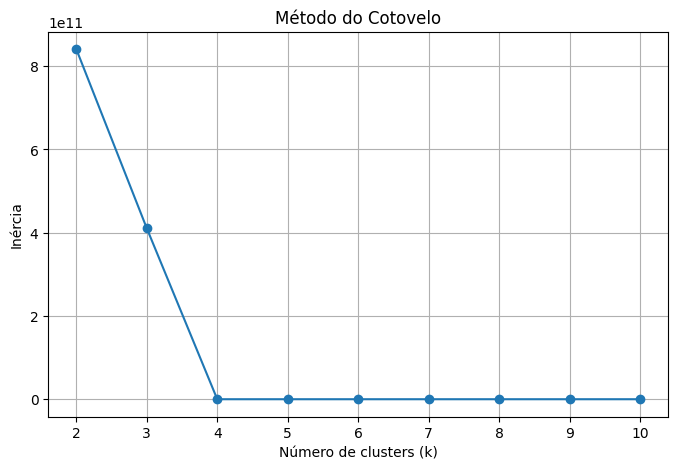

In [3]:
inercia = []
ks = range(2, 11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(ks, inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

## Avaliação com Silhouette Score

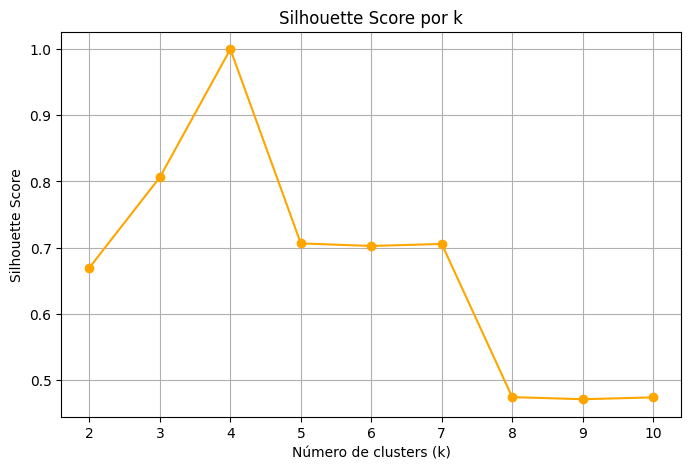

In [4]:
silhouettes = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouettes.append(score)

plt.figure(figsize=(8, 5))
plt.plot(ks, silhouettes, marker='o', color='orange')
plt.title('Silhouette Score por k')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## Execução do KMeans com k=4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df)

## Análise Descritiva dos Clusters

In [6]:
# Médias por cluster
medias = df.groupby('cluster').mean(numeric_only=True)

# Proporções de flags
flags = [col for col in df.columns if col.startswith('tem_')]
proporcoes = df[flags + ['cluster']].groupby('cluster').mean()

# Tamanho de cada cluster
tamanho = df['cluster'].value_counts().sort_index()

display(medias)
display(proporcoes)
display(tamanho)

,remuneracao_zscore,tempo_experiencia_anos,quantidade_experiencias,nivel_educacional,experiencia_sap,categoria_profissional_Consultoria / Projetos,categoria_profissional_Design / Criação,categoria_profissional_Educação / Treinamento,categoria_profissional_Engenharia,categoria_profissional_Financeiro / Contábil,...,nivel_hierarquico_Gerente,nivel_hierarquico_Indefinido,nivel_hierarquico_Júnior,nivel_hierarquico_Líder,nivel_hierarquico_Pleno,nivel_hierarquico_Sênior,nivel_hierarquico_Trainee,nivel_hierarquico_Técnico,tem_remuneracao_zscore,tem_tempo_experiencia_anos
cluster,,,,,,,,,,,,,,,,,,,,,
0,-9999.000000,-0.029057,0.338260,1.516548,0.320127,0.068466,0.003052,0.006164,0.009037,0.015022,...,0.633850,0.035430,0.010174,0.005745,0.038961,0.014184,0.002693,0.000000,0.0,1.0
1,-0.037299,-9999.000000,-0.424985,0.374701,0.023243,0.237076,0.007114,0.007114,0.031976,0.018453,...,0.074306,0.104310,0.012396,0.009720,0.067545,0.015143,0.004508,0.000211,1.0,0.0
2,0.091653,0.084028,0.492342,2.204915,0.345794,0.268432,0.011423,0.029768,0.020942,0.041364,...,0.119245,0.093112,0.019038,0.010384,0.031153,0.032537,0.022153,0.000000,1.0,1.0
3,-9999.000000,-9999.000000,-0.424840,0.926686,0.195791,0.069519,0.004313,0.007245,0.013110,0.006728,...,0.592375,0.058306,0.011385,0.002243,0.032948,0.014145,0.002933,0.000000,0.0,0.0


,tem_remuneracao_zscore,tem_tempo_experiencia_anos
cluster,,
0,0.0,1.0
1,1.0,0.0
2,1.0,1.0
3,0.0,0.0


0    16709
1    14198
2     5778
3     5797
Name: cluster, dtype: int64